# INTRODUCTION
Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other measurements, which are easier to obtain, are used to predict the age.

Evaluation metric : Root Mean Squared Logarithmic Error

This model achieved RMSLE of 0.151 on kaggle test data

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,  mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data
train_df = pd.read_csv('train.csv')
test_df = pd .read_csv( 'test.csv')

In [3]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [5]:
train_df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
train_df.shape

(90615, 10)

In [7]:
train_df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
train_df['Sex'].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

<BarContainer object of 1000 artists>

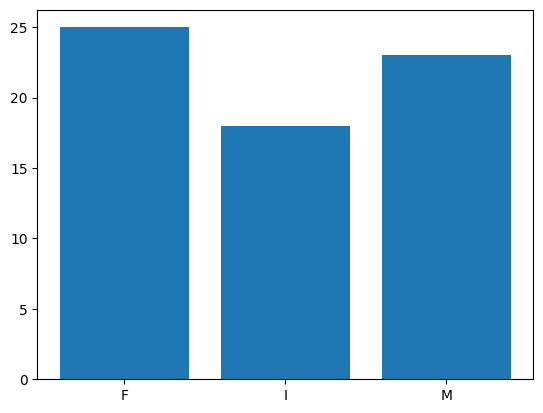

In [9]:
# Checking the relation between our target (Rings) and the Sex
fig, ax = plt.subplots()
ax.bar(train_df['Sex'][:1000], train_df['Rings'][:1000] )

It seems that the sex of Abalone effects the age, so we have to convert the Sex columns into the numerical data, to use it in our machine learning model.

In [10]:
df_tmp = train_df.copy()

In [11]:
test_temp = test_df.copy()

In [12]:
pd.api.types.is_string_dtype(df_tmp["Sex"])

True

In [13]:
pd.api.types.is_string_dtype(test_temp["Sex"])

True

In [14]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex


In [15]:
for label, content in test_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Sex


In [16]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [17]:
# This will turn all of the string value into category values
for label, content in test_temp.items():
    if pd.api.types.is_string_dtype(content):
        test_temp[label] = content.astype("category").cat.as_ordered()

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              90615 non-null  int64   
 1   Sex             90615 non-null  category
 2   Length          90615 non-null  float64 
 3   Diameter        90615 non-null  float64 
 4   Height          90615 non-null  float64 
 5   Whole weight    90615 non-null  float64 
 6   Whole weight.1  90615 non-null  float64 
 7   Whole weight.2  90615 non-null  float64 
 8   Shell weight    90615 non-null  float64 
 9   Rings           90615 non-null  int64   
dtypes: category(1), float64(7), int64(2)
memory usage: 6.3 MB


In [19]:
test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              60411 non-null  int64   
 1   Sex             60411 non-null  category
 2   Length          60411 non-null  float64 
 3   Diameter        60411 non-null  float64 
 4   Height          60411 non-null  float64 
 5   Whole weight    60411 non-null  float64 
 6   Whole weight.1  60411 non-null  float64 
 7   Whole weight.2  60411 non-null  float64 
 8   Shell weight    60411 non-null  float64 
dtypes: category(1), float64(7), int64(1)
memory usage: 3.7 MB


In [20]:
df_tmp.Sex.cat.categories

Index(['F', 'I', 'M'], dtype='object')

In [21]:
test_temp.Sex.cat.categories

Index(['F', 'I', 'M'], dtype='object')

In [22]:
df_tmp.Sex.cat.codes

0        0
1        0
2        1
3        2
4        1
        ..
90610    2
90611    2
90612    1
90613    1
90614    1
Length: 90615, dtype: int8

In [23]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [24]:
# Turn categorical variables into numbers and fill missing
for label, content in test_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        test_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        test_temp[label] = pd.Categorical(content).codes+1

In [25]:
test_temp.head(8)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_is_missing
0,90615,3,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,False
1,90616,3,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,False
2,90617,3,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,False
3,90618,3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,False
4,90619,2,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,False
5,90620,3,0.560,0.425,0.140,0.8105,0.3525,0.1915,0.2150,False
6,90621,3,0.635,0.490,0.170,1.1835,0.4605,0.2445,0.3550,False
7,90622,2,0.340,0.250,0.075,0.1675,0.0750,0.0330,0.0480,False


## Split the data into training and testing data

In [26]:
x = df_tmp.drop( 'Rings', axis = 1)
y = df_tmp['Rings']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((72492, 10), (18123, 10), (72492,), (18123,))

In [28]:
# Create a function to calculate Root Mean Squared Log error

def rmsle(y_test, y_preds):

  return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [29]:
# Create a function to determine different error metrics

def show_scores(model):

  train_preds = model.predict(x_train)
  test_preds = model.predict(x_test)

  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Test R^2": r2_score(y_test, test_preds)}
  return scores


From Scikit-learn algorithmic cheat sheet, we choose two models: 1. Lasso
                                                                 2. ElasticNet
                                                                 3. RandomForestRegressor

In [30]:
#Training the model with ElasticNet
model_1 = ElasticNet().fit(x_train, y_train)

In [31]:
show_scores(model_1)

{'Training MAE': 2.178794389860613,
 'Test MAE': 2.2042279739671913,
 'Training RMSLE': 0.27241420588637366,
 'Test RMSLE': 0.27553444483910156,
 'Training R^2': 0.09302684394620586,
 'Test R^2': 0.09179019700966262}

In [32]:
##Training the model with Lasso
model_2 = Lasso().fit(x_train, y_train)
show_scores(model_2)

{'Training MAE': 2.324021318283831,
 'Test MAE': 2.3492281888241995,
 'Training RMSLE': 0.2878292064537339,
 'Test RMSLE': 0.29095307463288833,
 'Training R^2': 1.5227952482321783e-06,
 'Test R^2': -2.4668404143612932e-05}

In [33]:
##Training the model with RandomForestRegressor
model_3 = RandomForestRegressor().fit(x_train, y_train)
show_scores(model_3)

{'Training MAE': 0.473925122772168,
 'Test MAE': 1.2934834188600122,
 'Training RMSLE': 0.05887228780554944,
 'Test RMSLE': 0.15580731734230474,
 'Training R^2': 0.9508683315574363,
 'Test R^2': 0.6473908245079365}

We are getting a better Root Mean Squared Logarithmic error with RandomForestRegressor, hence we will go with the RandomForestRegressor.

# Let's Tune the hyperparameters

In [34]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=60,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

CPU times: total: 49.9 s
Wall time: 2min 39s


In [35]:
show_scores(rs_model)

{'Training MAE': 1.1717150897697006,
 'Test MAE': 1.2731363397349935,
 'Training RMSLE': 0.14183551243095652,
 'Test RMSLE': 0.1535273245204191,
 'Training R^2': 0.6973554732230131,
 'Test R^2': 0.6531273385861833}

In [36]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

# Train model with best hyperparameters

In [37]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators= 60,
                                    min_samples_split= 14,
                                    min_samples_leaf= 9,
                                    max_samples= None,
                                    max_features= 'auto',
                                    max_depth= None,
                                    random_state=42 ) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(x_train, y_train);



C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 14.8 s
Wall time: 18.1 s


In [38]:
show_scores(ideal_model)

{'Training MAE': 0.9884949846979263,
 'Test MAE': 1.2674802837223391,
 'Training RMSLE': 0.12139492676286325,
 'Test RMSLE': 0.15329237008472835,
 'Training R^2': 0.7790226478958269,
 'Test R^2': 0.6558361464562966}

# Now, time to run our model on kaggle test data

In [40]:
submission = pd.read_csv('sample_submission.csv')
submission['Rings'] = ideal_model.predict(test_temp)
submission.head(10)

,id,Rings
0,90615,9.876478
1,90616,9.674840
2,90617,10.682646
3,90618,11.022666
4,90619,7.589495
5,90620,9.511655
6,90621,11.095111
7,90622,6.161701
8,90623,7.993654
9,90624,11.324369


In [41]:
# Exporting the results to the submission file
submission.to_csv( 'submission.csv' )

In [42]:
submission.shape

(60411, 2)